Відповідь: Про скільки книг зберігає дані датасет? 550
Відповідь: Чи є в якихось змінних пропуски? Ні
Відповідь: Які є унікальні жанри? Non Fiction, Fiction
Відповідь: Максимальна ціна? $105.00
Відповідь: Мінімальна ціна? $0.00
Відповідь: Середня ціна? $13.10
Відповідь: Медіанна ціна? $11.00
Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.8
Відповідь: Скільки книг мають такий рейтинг? Відповідь: 127
Відповідь: Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: $46.00
Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20
Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1
Відповідь: Яка книга остання у відсортованому списку? Відповідь: Diary of a Wimpy Kid #10
Відповідь: Максимальна ціна для жанру Fic

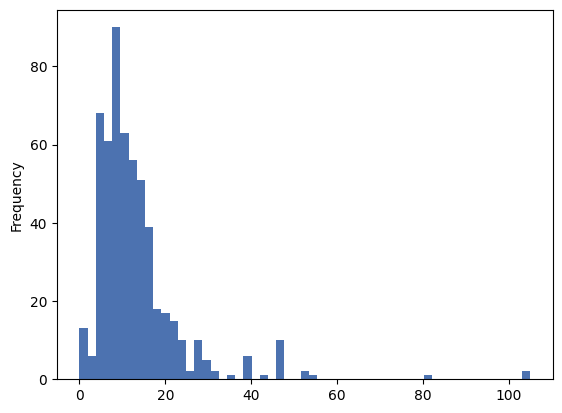

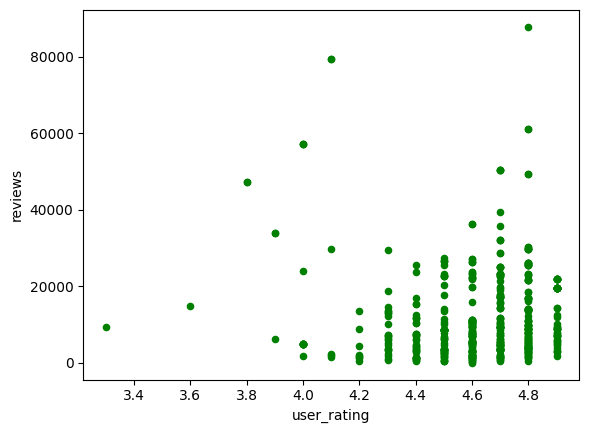

C:\Users\test\AppData\Local\Temp\ipykernel_18200\3763321250.py:101: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


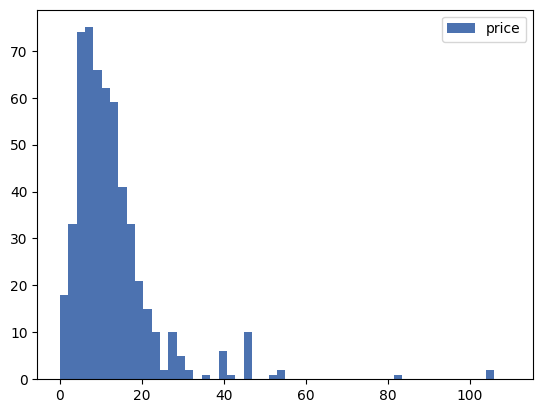

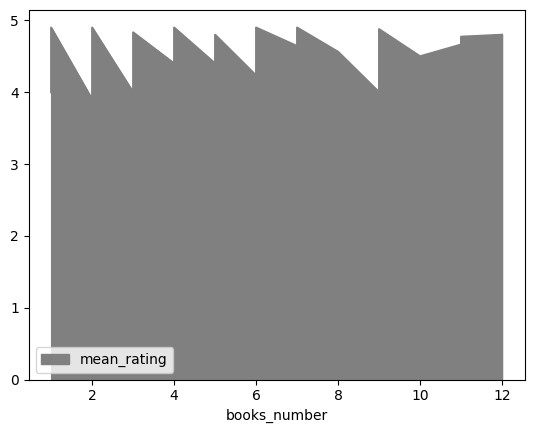

In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Прочитайте csv файл (використовуйте функцію read_csv)
df_bestsellers = pd.read_csv("bestsellers with categories.csv")

#Виведіть перші п'ять рядків (використовується функція head)
df_bestsellers.head()

#Виведіть розміри датасету (використовуйте атрибут shape)
df_bestsellers.shape

print('Відповідь: Про скільки книг зберігає дані датасет? 550')

df_bestsellers.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

###Первинне дослідження даних###

#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
df_bestsellers.isna().sum()
print('Відповідь: Чи є в якихось змінних пропуски? Ні')

#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
df_bestsellers['genre'].unique()

print('Відповідь: Які є унікальні жанри? Non Fiction, Fiction')

#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
ax = df_bestsellers['price'].plot.hist(bins=55)

#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
df_bestsellers['price'].agg(['min','max','mean','median'])
print('Відповідь: Максимальна ціна? $105.00')
print('Відповідь: Мінімальна ціна? $0.00')
print('Відповідь: Середня ціна? $13.10')
print('Відповідь: Медіанна ціна? $11.00')

###Пошук та сортування даних###

df_max_rate = df_bestsellers.groupby('user_rating')['name'].count().sort_values(ascending=False)
print('Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.8')
print('Відповідь: Скільки книг мають такий рейтинг? Відповідь: 127')

df_bestsellers.sort_values(by='reviews', ascending=False).head(1)
print('Відповідь: Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing')

df = df_bestsellers.query('year==2015').sort_values(by='user_rating', ascending=False).iloc[0:50]
max_price = df['price'].agg('max')
print('Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: $46.00')

fiction_books = df_bestsellers.query('year==2010').sort_values(by='user_rating', ascending=False).iloc[0:50].query('genre=="Fiction"')['name'].count()
print('Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20')

rating_4_9 = df_bestsellers.query('user_rating==4.9').isin({'year':[2010,2011]})['year'].sum()
print('Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1')

#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
df_bestsellers.query('year==2015 & price<8.0').sort_values(by='price', ascending=True).iloc[-1:]
print('Відповідь: Яка книга остання у відсортованому списку? Відповідь: Diary of a Wimpy Kid #10')


###Агрегування даних та з'єднання таблиць###

#Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg)
df_bestsellers.groupby('genre')['price'].agg(['min','max'])
print('Відповідь: Максимальна ціна для жанру Fiction: Відповідь: $82.00')
print('Відповідь: Мінімальна ціна для жанру Fiction: Відповідь: $0.00')
print('Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь: $105.00')
print('Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь: $0.00')

#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). 
df_authors_books = df_bestsellers.groupby('author')['name'].agg('count').sort_values(ascending=False)
df_authors_books.shape
df_authors_books.head(1)
print('Відповідь: Якої розмірності вийшла таблиця? Відповідь: (248,1)')
print('Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney')
print('Відповідь: Скільки книг цього автора? Відповідь: 12')


#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).
df_authors_rating = df_bestsellers.groupby('author')['user_rating'].agg('mean').sort_values(ascending=True)
df_authors_rating.head(1)
print('Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt')
print('Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9')

#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
df_authors = pd.concat([df_authors_books, df_authors_rating], axis=1)
df_authors.columns = ['books_number','mean_rating']
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
df_authors.sort_values(by=['books_number','mean_rating'], ascending=True, inplace=True)
df_authors.head(1)
print('Відповідь: Який автор перший у списку? Muriel Barbery, 1, 4.0')

#charts
df_bestsellers.plot(kind='scatter', x='user_rating', y='reviews', color='green')
plt.title = 'User Rating Correlation vs. Reviews Number'
plt.show()

plt.style.use('seaborn-deep')
x = df_bestsellers['price']
bins = np.linspace(0, 110, 55)
plt.hist([x], bins, label=['price'])
plt.legend(loc='upper right')
plt.title = 'Price Distribution'
plt.show()

df_authors.plot(kind='area', x='books_number', y='mean_rating', color='gray')
plt.title = 'No Dependency Between Books Number and Rating'
plt.show()